# Lab4 PCA multidimensional analysis

Chouliaras Andreas 2143

Pappas Apostolos 2109

Gkountouvas Stylianos 1973

## Importing the libraries

In [1]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

## Reading Multivariate Analysis Data into Python

The first thing that you will want to do to analyse your multivariate data will be to read it into Python, and to plot the data. For data analysis an I will be using the [Python Data Analysis Library](http://pandas.pydata.org) (pandas, imported as `pd`), which provides a number of useful functions for reading and analyzing the data, as well as a `DataFrame` storage structure, similar to that found in other popular data analytics languages, such as R.

We will use the Bank Marketing Data Set from the UCI Machine Learning Repository.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.


In [2]:
data = pd.read_csv("bank.csv",sep =';')
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names to be similar to R naming convention
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


We transform categorical data types to numeric in order to be able to use them.

In [3]:
df=data
lb_make = LabelEncoder()
df["V1"]= data["V1"].astype('int32')
df["V2"]= lb_make.fit_transform(data["V2"])
df["V3"]= lb_make.fit_transform(data["V3"])
df["V4"]= lb_make.fit_transform(data["V4"])
df["V5"]= lb_make.fit_transform(data["V5"])
df["V7"]= lb_make.fit_transform(data["V7"])
df["V8"]= lb_make.fit_transform(data["V8"])
df["V9"]= lb_make.fit_transform(data["V9"])
df["V11"]= lb_make.fit_transform(data["V11"])
df["V16"]= lb_make.fit_transform(data["V16"])
df["V17"]= lb_make.fit_transform(data["V17"])
df.V17 = df.V17.astype(str)
X = df.loc[:,  "V1":"V16"]  # independent variables data
y = df.V17  # dependednt variable data
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,3,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,3,0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0


### A Matrix Scatterplot

One common way of plotting multivariate data is to make a *matrix scatterplot*, showing each pair of variables plotted against each other. We can use the `scatter_matrix()` function from the `pandas.tools.plotting` package to do this.

To use the `scatter_matrix()` function, you need to give it as its input the variables that you want included in the plot. Say for example, that we just want to include the variables corresponding to the concentrations of the first five chemicals. These are stored in columns V2-V6 of the variable `data`. The parameter `diagonal` allows us to specify whether to plot a histogram (`"hist"`) or a Kernel Density Estimation (`"kde"`) for the variable. We can extract just these columns from the variable `data` by typing:

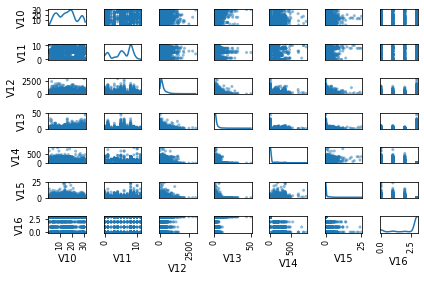

In [4]:
pd.plotting.scatter_matrix(df.loc[:, "V10":"V16"], diagonal="kde")
plt.tight_layout()
plt.show()

### A Scatterplot with the Data Points Labelled by their Group

If you see an interesting scatterplot for two variables in the matrix scatterplot, you may want to plot that scatterplot in more detail, with the data points labelled by their group (their cultivar in this case).

For example, in the matrix scatterplot above, the cell in the third column of the fourth row down is a scatterplot of V15 (x-axis) against V14 (y-axis). If you look at this scatterplot, it appears that there may be a positive relationship between V15 and V14.

We may therefore decide to examine the relationship between `V15` and `V14` more closely, by plotting a scatterplot of these two variables, with the data points labelled by their group (their cultivar). To plot a scatterplot of two variables, we can use the `lmplot` function from the `seaborn` package. The V14 and V15 variables are stored in the columns V14 and V15 of the variable `data`. The first two parameters in the `lmplot()` function are the columns to be plotted against each other in x-y, the third parameter specifies the data, the `hue` parameter is the column name used for the labels of the datapoints, i.e. the classes they belong to, lastly, the `fit_reg` parameter is set to `False` when we do not want to plot a regression model relating to the x-y variables. Therefore, to plot the scatterplot, we type:

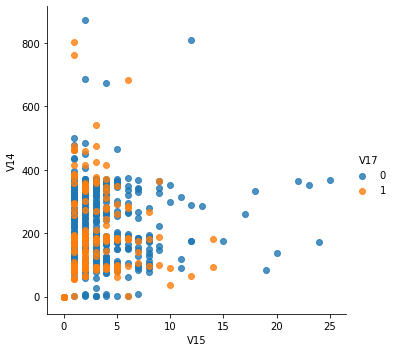

In [5]:
sns.lmplot("V15", "V14", df, hue="V17", fit_reg=False);

### A Profile Plot

Another type of plot that is useful is a *profile plot*, which shows the variation in each of the variables, by plotting the value of each of the variables for each of the samples.

This can be achieved using `pandas` plot facilities, which are built upon `matplotlib`, by running the following:

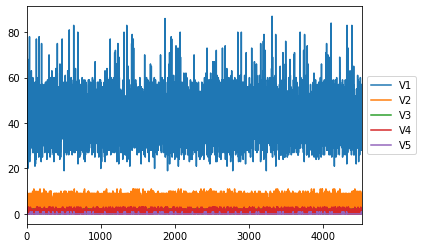

In [9]:
ax = df[["V1","V2","V3","V4","V5"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Calculating Summary Statistics for Multivariate Data

Another thing that you are likely to want to do is to calculate summary statistics such as the mean and standard deviation for each of the variables in your multivariate data set.

This is easy to do, using the `mean()` and `std()` functions in `numpy` and applying them to the dataframe using its member function `apply`.

<p><div class="alert alert-success">
Pandas allows to do simple operations directly calling them as methods, for example we could do compute the means of a dataframe `df` by calling `df.mean()`.

An alternative option is to use the `apply` method of the `pandas.DataFrame` class, which applies the passed argument function along the input axis of the DataFrame. This method is powerful as it allows passing any function we want to be applied in our data.
</div></p>

For example, say we want to calculate the mean and standard deviations of each of the 13 chemical concentrations in the wine samples. These are stored in columns V2-V14 of the variable `data`, which has been previously assigned to `X` for convenience. So we type:

In [10]:
X.apply(np.mean)

V1       41.170095
V2        4.411192
V3        1.147755
V4        1.231365
V5        0.016810
V6     1422.657819
V7        0.566025
V8        0.152842
V9        0.652289
V10      15.915284
V11       5.540146
V12     263.961292
V13       2.793630
V14      39.766645
V15       0.542579
V16       2.559168
dtype: float64

In [11]:
X.apply(np.std)

V1       10.575041
V2        3.255356
V3        0.599583
V4        0.748661
V5        0.128561
V6     3009.305273
V7        0.495621
V8        0.359835
V9        0.901398
V10       8.246755
V11       3.002431
V12     259.827892
V13       3.109463
V14     100.110051
V15       1.693375
V16       0.991941
dtype: float64

For convenience, you might want to use the function `printMeanAndSdByGroup()` below, which prints out the mean and standard deviation of the variables for each group in your data set:

In [12]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))
    
printMeanAndSdByGroup(X, y)

## Means:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
V17,,,,,,,,,,,,,,,,
0,40.998000,4.379000,1.144500,1.219750,0.016750,1403.211750,0.584750,0.162000,0.695750,15.948750,5.584500,226.347500,2.862250,36.006000,0.471250,2.588750
1,42.491363,4.658349,1.172745,1.320537,0.017274,1571.955854,0.422265,0.082534,0.318618,15.658349,5.199616,552.742802,2.266795,68.639155,1.090211,2.332054



## Standard deviations:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
V17,,,,,,,,,,,,,,,,
0,10.187124,3.271522,0.590864,0.749973,0.128333,3074.964870,0.492765,0.368451,0.918249,8.248704,2.943528,210.287340,3.212207,96.285619,1.627167,0.980879
1,13.103179,3.117404,0.662185,0.732401,0.130292,2442.051957,0.493920,0.275176,0.671763,8.227241,3.401829,389.951032,2.090062,121.845960,2.053395,1.045560



## Sample sizes:


,0
V17,
0,4000
1,521


### Between-groups Variance and Within-groups Variance for a Variable

If we want to calculate the within-groups variance for a particular variable (for example, for a particular chemical’s concentration), we can use the function `calcWithinGroupsVariance()` below:

The `variable` parameter of the function `calcWithinGroupsVariance()` is the input variable for which we wish to compute its within-groups variance for the groups given in `groupvariable`.

So for example, to calculate the within-groups variance of the variable V1 (age), we type:

In [13]:
def calcWithinGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the standard deviation for group i:
        sdi = np.std(levelidata)
        numi = (levelilength)*sdi**2
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the within-groups variance
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

calcWithinGroupsVariance(X.V1, y)

111.65350633601187

We can calculate the between-groups variance for a particular variable (eg. V1) using the function `calcBetweenGroupsVariance()` below:

Similarly to the parameters of the function `calcWithinGroupsVariance()`, the `variable` parameter of the function `calcBetweenGroupsVariance()` is the input variable for which we wish to compute its between-groups variance for the groups given in `groupvariable`.

So for example, to calculate the between-groups variance of the variable V2 (the concentration of the first chemical), we type:

In [17]:
def calcBetweenGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    # calculate the overall grand mean:
    grandmean = np.mean(variable)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the mean and standard deviation for group i:
        meani = np.mean(levelidata)
        sdi = np.std(levelidata)
        numi = levelilength * ((meani - grandmean)**2)
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the between-groups variance
    Vb = numtotal / (numlevels - 1)
    return(Vb)

calcBetweenGroupsVariance(X.V1, y)

1028.0017266643513

We can calculate the *separation* achieved by a variable as its between-groups variance devided by its within-groups variance. Thus, the separation achieved by V1 is calculated as:

In [18]:
calcBetweenGroupsVariance(X.V1, y) / calcWithinGroupsVariance(X.V1, y)

9.207070699335372

If you want to calculate the separations achieved by all of the variables in a multivariate data set, you can use the function `calcSeparations()` below:

In [19]:
def calcSeparations(variables, groupvariable):
    # calculate the separation for each variable
    for variablename in variables:
        variablei = variables[variablename]
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        sep = Vb/Vw
        print("variable", variablename, "Vw=", Vw, "Vb=", Vb, "separation=", sep)
        
calcSeparations(X, y)

variable V1 Vw= 111.65350633601187 Vb= 1028.0017266643513 separation= 9.207070699335372
variable V2 Vw= 10.594074392658168 Vb= 35.97149354367193 separation= 3.395435241478071
variable V3 Vw= 0.3595777771737076 Vb= 0.3677374050124753 separation= 1.0226922472876456
variable V4 Vw= 0.5597056869927313 Vb= 4.682480019771256 separation= 8.365968273308013
variable V5 Vw= 0.016535136036839967 Vb= 0.00012679674421902295 separation= 0.007668321804944467
variable V6 Vw= 9057021.612222258 Vb= 13125638.013701092 separation= 1.4492223355179283
variable V7 Vw= 0.2430563127787601 Vb= 12.169995678197838 separation= 50.07068336988832
variable V8 Vw= 0.12889467927908563 Vb= 2.9109208916716662 separation= 22.583716472647218
variable V9 Vw= 0.7983706915225502 Vb= 65.56165058358498 separation= 82.11931034010554
variable V10 Vw= 68.03046690206291 Vb= 38.87392934327388 separation= 0.5714194112358075
variable V11 Vw= 9.003469555924886 Vb= 68.2845804250669 separation= 7.584251826578464
variable V12 Vw= 56673.43

Thus, the individual variable which gives the greatest separations between the groups (the wine cultivars) is V12 (separation 866.5). As we will discuss below, the purpose of linear discriminant analysis (LDA) is to find the linear combination of the individual variables that will give the greatest separation between the groups (cultivars here). This hopefully will give a better separation than the best separation achievable by any individual variable.

### Between-groups Covariance and Within-groups Covariance for Two Variables

If you have a multivariate data set with several variables describing sampling units from different groups, such as the wine samples from different cultivars, it is often of interest to calculate the within-groups covariance and between-groups variance for pairs of the variables.

This can be done using the following functions:

In [20]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

For example, to calculate the within-groups covariance for variables V8 and V12, we type:

In [21]:
calcWithinGroupsCovariance(X.V8, X.V12, y)

2.1783313788359573

In [22]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

For example, to calculate the between-groups covariance for variables V8 and V12, we type:

In [23]:
calcBetweenGroupsCovariance(X.V8, X.V12, y)

-11956.132099942219

Thus, for V8 and V12, the between-groups covariance is -11956.13 and the within-groups covariance is 2.178. Since the within-groups covariance is positive, it means V8 and V12 are positively related within groups: for individuals from the same group, individuals with a high value of V8 tend to have a high value of V12, and vice versa. Since the between-groups covariance is negative, V8 and V12 are negatively related between groups: groups with a high mean value of V8 tend to have a low mean value of V12, and vice versa.

### Calculating Correlations for Multivariate Data¶

It is often of interest to investigate whether any of the variables in a multivariate data set are significantly correlated.

To calculate the linear (Pearson) correlation coefficient for a pair of variables, you can use the `pearsonr()` function from `scipy.stats` package. For example, to calculate the correlation coefficient for the first two chemicals’ concentrations, V2 and V3, we type:

In [24]:
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 3.011587158330101e-06
cor:		 0.06939025659658547


This tells us that the correlation coefficient is about 0.0694, which is a very weak correlation. Furthermore, the *p-value* for the statistical test of whether the correlation coefficient is significantly different from zero is $3.011*10^{-6}$. This is much smaller than 0.05 (which we can use here as a cutoff for statistical significance) so there is strong evidence that that the correlation is non-zero.

If you have a lot of variables, you can use the `pandas.DataFrame` method `corr()` to calculate a correlation matrix that shows the correlation coefficient for each pair of variables.

In [25]:
corrmat = X.corr()
corrmat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
V1,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320
V2,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.006739,-0.002739,-0.022760,0.005029,0.013049
V3,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,-0.027716
V4,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.014878,-0.001723,0.012077,0.023983,-0.032135
V5,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.039032
V6,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,-0.029268
V7,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.093093
V8,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,0.027028
V9,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,-0.011380,0.012278,-0.243223,-0.187232,0.267173
V10,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.073714


A better graphical representation of the correlation matrix is via a correlation matrix plot in the form of a *heatmap*.

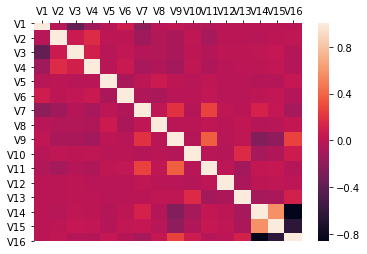

In [26]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

Or an alternative nice visualization is via a Hinton diagram. The color of the boxes determines the sign of the correlation, in this case red for positive and blue for negative correlations; while the size of the boxes determines their magnitude, the bigger the box the higher the magnitude.

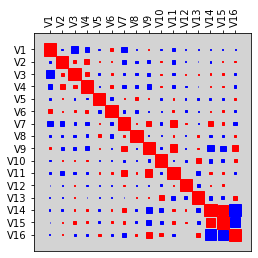

In [27]:
# adapted from http://matplotlib.org/examples/specialty_plots/hinton_demo.html
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

Although the correlation matrix and diagrams are useful for quickly looking to identify the strongest correlations, they still require labor work to find the top `N` strongest correlations. For this you can use the function `mosthighlycorrelated()` below.

The function `mosthighlycorrelated()` will print out the linear correlation coefficients for each pair of variables in your data set, in order of the correlation coefficient. This lets you see very easily which pair of variables are most highly correlated.

In [28]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

The arguments of the function are the variables that you want to calculate the correlations for, and the number of top correlation coefficients to print out (for example, you can tell it to print out the largest 10 correlation coefficients, or the largest 20).

For example, to calculate correlation coefficients in our dataset we can type:

In [30]:
mosthighlycorrelated(X, 10)

,FirstVariable,SecondVariable,Correlation
0,V14,V16,-0.859245
1,V15,V16,-0.636372
2,V14,V15,0.577562
3,V1,V3,-0.381485
4,V9,V11,0.370077
5,V9,V16,0.267173
6,V7,V11,0.266630
7,V9,V14,-0.243223
8,V7,V9,0.196454
9,V1,V7,-0.193888


This tells us that the pair of variables with the highest linear correlation coefficient are V14 and V15 (correlation = 0.57 approximately).

### Standardising Variables

If you want to compare different variables that have different units, are very different variances, it is a good idea to first standardise the variables.

As a result, it is not a good idea to use the unstandardised values as the input for a principal component analysis (PCA, see below), as if you did that, the first principal component would be dominated by the variables which show the largest variances, such as V6.

Thus, it would be a better idea to first standardise the variables so that they all have variance 1 and mean 0, and to then carry out the principal component analysis on the standardised data. This would allow us to find the principal components that provide the best low-dimensional representation of the variation in the original data, without being overly biased by those variables that show the most variance in the original data.

You can standardise variables by using the `scale()` function from the package `sklearn.preprocessing`.

For example, to standardise our data, we type:

In [34]:
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

standardisedX.apply(np.mean)

C:\Users\Admin\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


V1    -1.178737e-16
V2     1.634515e-16
V3    -1.665948e-16
V4     1.575579e-16
V5     2.750387e-18
V6    -1.571649e-17
V7     1.434130e-16
V8     5.972268e-17
V9     9.744227e-17
V10    2.357474e-18
V11    2.553930e-17
V12   -7.622500e-17
V13   -6.286598e-18
V14   -3.889832e-17
V15    3.929124e-18
V16    2.506781e-16
dtype: float64

In [35]:
standardisedX.apply(np.std)

V1     1.0
V2     1.0
V3     1.0
V4     1.0
V5     1.0
V6     1.0
V7     1.0
V8     1.0
V9     1.0
V10    1.0
V11    1.0
V12    1.0
V13    1.0
V14    1.0
V15    1.0
V16    1.0
dtype: float64

## Principal Component Analysis

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set. We can carry out a principal component analysis to investigate whether we can capture most of the variation between samples using a smaller number of new variables (principal components), where each of these new variables is a linear combination of all or some of the 16 attributes of the bank marketing campaign.

To carry out a principal component analysis (PCA) on a multivariate data set, the first step is often to standardise the variables under study using the `scale()` function (see above). This is necessary if the input variables have very different variances, which is true in this case as the 16 attributes of the bank marketing campaign have very different variances (see above).

Once you have standardised your variables, you can carry out a principal component analysis using the `PCA` class from `sklearn.decomposition` package and its `fit` method, which fits the model with the data `X`. The default `solver` is Singular Value Decomposition ("svd"). For more information you can type `help(PCA)` in the python console.

For example, to standardise the 16 attributes of the bank marketing campaign samples, and carry out a principal components analysis on the standardised concentrations, we type:

In [36]:
pca = PCA().fit(standardisedX)

You can get a summary of the principal component analysis results using the `pca_summary()` function below, which simulates the output of R's `summary` function on a PCA model:

In [37]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

The parameters of the `print_pca_summary` function are:
* `pca`: A PCA object
* `standardised_data`: The standardised data
* `out (True)`: Print to standard output

In [38]:
summary = pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.595022,0.159006,0.159006
PC2,1.300450,0.105698,0.264704
PC3,1.212347,0.091862,0.356566
PC4,1.090326,0.074301,0.430866
PC5,1.068324,0.071332,0.502199
PC6,1.017146,0.064662,0.566860
PC7,0.985820,0.060740,0.627600
PC8,0.964796,0.058177,0.685777
PC9,0.956962,0.057236,0.743013


This gives us the standard deviation of each component, and the proportion of variance explained by each component. The standard deviation of the components is stored in a named row called `sdev` of the output variable made by the `pca_summary` function and stored in the `summary` variable:

In [39]:
summary.sdev

,Standard deviation
PC1,1.595022
PC2,1.300450
PC3,1.212347
PC4,1.090326
PC5,1.068324
PC6,1.017146
PC7,0.985820
PC8,0.964796
PC9,0.956962
PC10,0.922143


The total variance explained by the components is the sum of the variances of the components:

In [40]:
np.sum(summary.sdev**2)

Standard deviation    16.0
dtype: float64

In this case, we see that the total variance is 16, which is equal to the number of standardised variables (16 variables). This is because for standardised data, the variance of each standardised variable is 1. The total variance is equal to the sum of the variances of the individual variables, and since the variance of each standardised variable is 1, the total variance should be equal to the number of variables (16 here).

### Deciding How Many Principal Components to Retain

In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot, which we can do using the `screeplot()` function below:

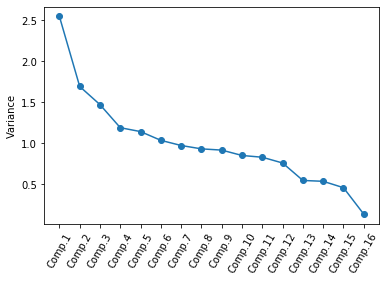

In [41]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)

The most obvious change in slope in the scree plot occurs at component 4, which is the "elbow" of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

Another way of deciding how many components to retain is to use *Kaiser’s criterion*: that we should only retain principal components for which the variance is above 1 (when principal component analysis was applied to standardised data). We can check this by finding the variance of each of the principal components:

In [42]:
summary.sdev**2

,Standard deviation
PC1,2.544095
PC2,1.691171
PC3,1.469786
PC4,1.188810
PC5,1.141317
PC6,1.034586
PC7,0.971840
PC8,0.930830
PC9,0.915777
PC10,0.850347


We see that the variance is above 1 for principal components 1, 2, 3, 4, 5 and 6. Therefore, using Kaiser’s criterion, we would retain the first six principal components.

A third way to decide how many principal components to retain is to decide to keep the number of components required to explain at least some minimum amount of the total variance. For example, if it is important to explain at least 80% of the variance, we would retain the first eleven principal components, as we can see from cumulative proportions (`summary.cumprop`) that the first eleven principal components explain 84.7% of the variance (while the first ten components explain just 79.6%, so are not sufficient).

### Loadings for the Principal Components

The loadings for the principal components are stored in a named element `components_` of the variable returned by `PCA().fit()`. This contains a matrix with the loadings of each principal component, where the first column in the matrix contains the loadings for the first principal component, the second column contains the loadings for the second principal component, and so on.

Therefore, to obtain the loadings for the first principal component in our analysis of the 16 attributes of the bank marketing campaign samples, we type:

In [43]:
pca.components_[0]

array([-0.0226325 ,  0.00364652,  0.04883496,  0.04601961, -0.03597265,
        0.02804409,  0.05758993, -0.03364739, -0.24922459, -0.08749701,
       -0.00508091,  0.01797468, -0.10944847,  0.56732867,  0.49556443,
       -0.58215131])

This means that the first principal component is a linear combination of the variables:
```
array[0]*Z1 + array[1]*Z2 + array[2]*Z3 + array[3]*Z4 + ... +  array[15]*Z16
```

where Z1, Z2, Z3, ..., Z16 are the standardised versions of the variables V1, V2, V3, ..., V16 (that each have mean of 0 and variance of 1).

Note that the square of the loadings sum to 1, as this is a constraint used in calculating the loadings:

In [44]:
np.sum(pca.components_[0]**2)

1.0000000000000016

To calculate the values of the first principal component, we can define our own function to calculate a principal component given the loadings and the input variables' values:

In [45]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

We can then use the function to calculate the values of the first principal component for each sample in our bank data:

In [47]:
calcpc(standardisedX, pca.components_[0])

array([-0.55905504,  4.49935271,  3.7252057 , ..., -0.90216884,
        2.79131693,  4.43198179])

In fact, the values of the first principal component are computed with the following, so we can compare those values to the ones that we calculated, and they should agree:

In [51]:
pca.transform(standardisedX)[:, 0]

array([-0.55905504,  4.49935271,  3.7252057 , ..., -0.90216884,
        2.79131693,  4.43198179])

We see that they do agree.

Similarly, we can obtain the loadings for the second principal component by typing:

In [52]:
pca.components_[1]

array([ 0.01178552,  0.3107548 ,  0.1659012 ,  0.28284998, -0.03741076,
        0.06263553, -0.4809901 , -0.07254273, -0.46707764,  0.12114526,
       -0.54123738, -0.03123711,  0.13060077, -0.07396087, -0.04325306,
        0.05176472])

This means that the second principal component is a linear combination of the variables: 
```
array[0]*Z1 + array[1]*Z2 + array[2]*Z3 + array[3]*Z4 + ... +  array[15]*Z16
```

where Z1, Z2, Z3, ..., Z16 are the standardised versions of variables V1, V2, ..., V16 that each have mean 0 and variance 1.

Note that the square of the loadings sum to 1, as above:

In [53]:
np.sum(pca.components_[1]**2)

0.9999999999999992

### Scatterplots of the Principal Components


The values of the principal components can be computed by the `transform()` (or `fit_transform()`) method of the `PCA` class. It returns a matrix with the principal components, where the first column in the matrix contains the first principal component, the second column the second component, and so on.

Thus, in our example, `pca.transform(standardisedX)[:, 0]` contains the first principal component, and `pca.transform(standardisedX)[:, 1]` contains the second principal component.

We can make a scatterplot of the first two principal components, and label the data points with the cultivar that the bank samples come from, by typing:

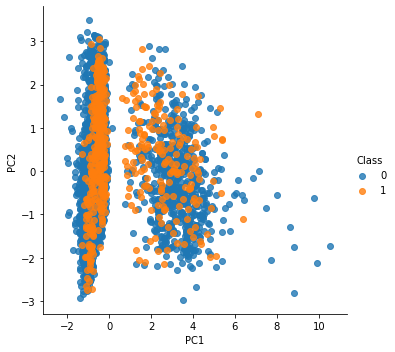

In [54]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)

The scatterplot shows the first principal component on the x-axis, and the second principal component on the y-axis. We can see from the scatterplot that bank samples are not so well seperated. 

Therefore, the first two principal components are not so useful for distinguishing wine samples of the bank dataset.

We print out the means of the standardised concentration variables in each target value, using the `printMeanAndSdByGroup()` function (see above):

In [55]:
printMeanAndSdByGroup(standardisedX, y);

## Means:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
V17,,,,,,,,,,,,,,,,
0,-0.016274,-0.009889,-0.005429,-0.015514,-0.000470,-0.006462,0.037780,0.025450,0.048215,0.004058,0.014773,-0.144764,0.022068,-0.037565,-0.042122,0.029822
1,0.124942,0.075923,0.041679,0.119110,0.003609,0.049612,-0.290061,-0.195391,-0.370171,-0.031156,-0.113418,1.111434,-0.169430,0.288408,0.323397,-0.228960



## Standard deviations:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
V17,,,,,,,,,,,,,,,,
0,0.963318,1.004966,0.985457,1.001752,0.998231,1.021819,0.994237,1.023943,1.018694,1.000236,0.980382,0.809333,1.033043,0.961798,0.960902,0.988848
1,1.239066,0.957623,1.104409,0.978281,1.013469,0.811500,0.996568,0.764727,0.745245,0.997634,1.133025,1.500805,0.672162,1.217120,1.212605,1.054055



## Sample sizes:


,0
V17,
0,4000
1,521


## Linear Discriminant Analysis

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set. For example, in the bank data set, we have 16 features for every customer. By carrying out a principal component analysis, we found that most of the variation in the data between the samples can be captured using the first five principal components, where each of the principal components is a particular linear combination of the 16 customer data.

The purpose of linear discriminant analysis (LDA) is to find the linear combinations of the original variables that gives the best possible separation between the groups in our data set. *Linear discriminant analysis* is also known as *canonical discriminant analysis*, or simply *discriminant analysis*.

If we want to separate the customers, the number of groups (G) is 2, and the number of variables is 16 (p = 16). The maximum number of useful discriminant functions that can separate the wines by cultivar is the minimum of G-1 and p, and so in this case it is the minimum of 1 and 16, which is 1. Thus, we can find at most 1 useful discriminant function to separate the customers using the 16 features.

You can carry out a linear discriminant analysis by using the `LinearDiscriminantAnalysis` class model from the module `sklearn.discriminant_analysis` and using its method `fit()` to fit our `X, y` data.

For example, to carry out a linear discriminant analysis using the 16 features for the bank dataset, we type:

In [56]:
lda = LinearDiscriminantAnalysis().fit(X, y)

### Loadings for the Discriminant Functions

The values of the loadings of the discriminant functions for the wine data are stored in the `scalings_` member of the `lda` object model. For a pretty print we can type:

In [57]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

pretty_scalings_ = pretty_scalings(lda, X, out=True)

Coefficients of linear discriminants:


,LD1
V1,0.009055
V2,0.004604
V3,0.040719
V4,0.098088
V5,0.277095
V6,0.000007
V7,-0.459725
V8,-0.426795
V9,-0.257246
V10,0.001712


This means that the first discriminant function is a linear combination of the variables.

where V1, V2, ..., V16 are the 16 customer data of the bank dataset. For convenience, the value for each discriminant function (eg. the first discriminant function) are scaled so that their mean value is zero (see below).

Note that these loadings are calculated so that the within-group variance of each discriminant function for each group (cultivar) is equal to 1, as will be demonstrated below.

As mentioned above, these scalings are stored in the named member `scalings_` of the object variable returned by `LinearDiscriminantAnalysis().fit(X, y)`. This element contains a numpy array, in which the first column contains the loadings for the first discriminant function, the second column contains the loadings for the second discriminant function and so on. For example, to extract the loadings for the first discriminant function, we can type:

In [58]:
lda.scalings_[:, 0]

array([ 0.00905507,  0.00460414,  0.0407188 ,  0.09808803,  0.27709511,
        0.00000732, -0.45972488, -0.42679504, -0.25724622,  0.00171193,
        0.01230136,  0.00379533, -0.01961302,  0.00277058,  0.12112021,
        0.21998582])

Or for "prettier" print, use the dataframe variable created above:

In [59]:
pretty_scalings_.LD1

V1     0.009055
V2     0.004604
V3     0.040719
V4     0.098088
V5     0.277095
V6     0.000007
V7    -0.459725
V8    -0.426795
V9    -0.257246
V10    0.001712
V11    0.012301
V12    0.003795
V13   -0.019613
V14    0.002771
V15    0.121120
V16    0.219986
Name: LD1, dtype: float64

To calculate the values of the first discriminant function, we can define our own function `calclda()`:

In [60]:
def calclda(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the discriminant function
    ld = np.zeros(numsamples)
    # calculate the value of the discriminant function for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        ld[i] = valuei
    # standardise the discriminant function so that its mean value is 0:
    ld = scale(ld, with_std=False)
    return ld

The function `calclda()` simply calculates the value of a discriminant function for each sample in the data set.

Furthermore, the `scale()` command is used within the `calclda()` function in order to standardise the value of a discriminant function (eg. the first discriminant function) so that its mean value (over all the wine samples) is 0.

We can use the function `calclda()` to calculate the values of the first discriminant function for each sample in our wine data:

In [61]:
calclda(X, lda.scalings_[:, 0])

array([-0.39931067,  0.11095867,  0.04469072, ..., -0.10584483,
        0.1677853 ,  0.97628994])

In fact, the values of the first linear discriminant function can be calculated using the `transform(X)` or `fit_transform(X, y)` methods of the LDA object, so we can compare those to the ones that we calculated, and they should agree:

In [62]:
# Try either, they produce the same result, use help() for more info
# lda.transform(X)[:, 0]
lda.fit_transform(X, y)[:, 0]

array([-0.39931067,  0.11095867,  0.04469072, ..., -0.10584483,
        0.1677853 ,  0.97628994])

We see that they do agree.

It doesn’t matter whether the input variables for linear discriminant analysis are standardised or not, unlike for principal components analysis in which it is often necessary to standardise the input variables. However, using standardised variables in linear discriminant analysis makes it easier to interpret the loadings in a linear discriminant function.

In linear discriminant analysis, the standardised version of an input variable is defined so that it has mean zero and within-groups variance of 1. Thus, we can calculate the “group-standardised” variable by subtracting the mean from each value of the variable, and dividing by the within-groups standard deviation. To calculate the group-standardised version of a set of variables, we can use the function `groupStandardise()` below:

In [63]:
def groupStandardise(variables, groupvariable):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # find the variable names
    variablenames = variables.columns
    # calculate the group-standardised version of each variable
    variables_new = pd.DataFrame()
    for i in range(numvariables):
        variable_name = variablenames[i]
        variablei = variables[variable_name]
        variablei_Vw = calcWithinGroupsVariance(variablei, groupvariable)
        variablei_mean = np.mean(variablei)
        variablei_new = (variablei - variablei_mean)/(np.sqrt(variablei_Vw))
        variables_new[variable_name] = variablei_new
    return variables_new

For example, we can use the `groupStandardise()` function to calculate the group-standardised versions of the customer data in bank samples:

In [64]:
groupstandardisedX = groupStandardise(X, y)

We can then use the `LinearDiscriminantAnalysis().fit()` method to perform linear disriminant analysis on the group-standardised variables:

In [65]:
lda2 = LinearDiscriminantAnalysis().fit(groupstandardisedX, y)
pretty_scalings(lda2, groupstandardisedX)

,LD1
V1,0.095681
V2,0.014986
V3,0.024417
V4,0.073383
V5,0.035631
V6,0.022039
V7,-0.226648
V8,-0.153228
V9,-0.229854
V10,0.014120


It makes sense to interpret the loadings calculated using the group-standardised variables rather than the loadings for the original (unstandardised) variables.

In the first discriminant function calculated for the group-standardised variables, the largest loadings (in absolute) value are given to V7, V8, V9, V12, V14, V15, V16. The loadings for V7, V8 and V9 are negative, while the rest are positive. Therefore, the discriminant function seems to represent a contrast between the concentrations of V7,V8 and V9 and the concentrations of V12, V14, V15 and V16.

We found above that variables V9 and V12 are the variables that gave the greatest separations between groups when used individually, it is not surprising that these are the two variables that have the largest loadings in the first discriminant function.

Note that although the loadings for the group-standardised variables are easier to interpret than the loadings for the unstandardised variables, the values of the discriminant function are the same regardless of whether we standardise the input variables or not. For example, for bank data, we can calculate the value of the first discriminant function calculated using the unstandardised and group-standardised variables by typing:

In [69]:
lda.fit_transform(X, y)[:, 0]

array([-0.39931067,  0.11095867,  0.04469072, ..., -0.10584483,
        0.1677853 ,  0.97628994])

In [70]:
lda2.fit_transform(groupstandardisedX, y)[:, 0]

array([-0.39931067,  0.11095867,  0.04469072, ..., -0.10584483,
        0.1677853 ,  0.97628994])

We can see that although the loadings are different for the first discriminant functions calculated using unstandardised and group-standardised data, the actual values of the first discriminant function are the same.

### Separation Achieved by the Discriminant Functions

To calculate the separation achieved by each discriminant function, we first need to calculate the value of each discriminant function, by substituting the values of the variables into the linear combination for the discriminant function and then scaling the values of the discriminant function so that their mean is zero.

As mentioned above, we can do this using the `rpredict()` function which simulates the output of the `predict()` function in R. For example, to calculate the value of the discriminant functions for the wine data, we type:

In [71]:
def rpredict(lda, X, y, out=False):
    ret = {"class": lda.predict(X),
           "posterior": pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)}
    ret["x"] = pd.DataFrame(lda.fit_transform(X, y))
    ret["x"].columns = ["LD"+str(i+1) for i in range(ret["x"].shape[1])]
    if out:
        print("class")
        print(ret["class"])
        print()
        print("posterior")
        print(ret["posterior"])
        print()
        print("x")
        print(ret["x"])
    return ret

lda_values = rpredict(lda, standardisedX, y, True)

class
['0' '0' '0' ... '0' '0' '0']

posterior
             0         1
0     0.991383  0.008617
1     0.999795  0.000205
2     0.998761  0.001239
3     0.999827  0.000173
4     0.999004  0.000996
5     0.993232  0.006768
6     0.998118  0.001882
7     0.997589  0.002411
8     0.998814  0.001186
9     0.999873  0.000127
...        ...       ...
4511  0.999004  0.000996
4512  0.999021  0.000979
4513  0.990005  0.009995
4514  0.999133  0.000867
4515  0.997451  0.002549
4516  0.997706  0.002294
4517  0.994269  0.005731
4518  0.990622  0.009378
4519  0.993261  0.006739
4520  0.999473  0.000527

[4521 rows x 2 columns]

x
           LD1
0    -0.399311
1     0.110959
2     0.044691
3    -1.314045
4    -0.558023
5     0.177851
6     1.042761
7    -0.489273
8    -1.262320
9    -0.441659
...        ...
4511  3.262413
4512  0.946631
4513  0.731079
4514 -1.155556
4515  1.182398
4516  0.064585
4517 -0.899197
4518 -0.105845
4519  0.167785
4520  0.976290

[4521 rows x 1 columns]


The returned variable has a named element `x` which is a matrix containing the linear discriminant functions: the first column of `x` contains the first discriminant function, the second column of `x` contains the second discriminant function, and so on (if there are more discriminant functions).

We can therefore calculate the separations achieved by the two linear discriminant functions for the wine data by using the `calcSeparations()` function (see above), which calculates the separation as the ratio of the between-groups variance to the within-groups variance:

In [72]:
calcSeparations(lda_values["x"], y)

variable LD1 Vw= 0.9999999999999988 Vb= 1160.947635992428 separation= 1160.9476359924295


As mentioned above, the loadings for each discriminant function are calculated in such a way that the within-group variance (`Vw`) for each group is equal to 1, as we see in the output from `calcSeparations()` above.

The output from `calcSeparations()` tells us that the separation achieved by the discriminant function is 1160.94

The *proportion of trace* (as reported in R by the `lda()` model) is the percentage separation achieved by each discriminant function. Note that in `sklearn` the proportion of trace is reported as `explained_variance_ratio_` in a `LinearDiscriminantAnalysis` model and is computed only for an "eigen" solver, while so far we have been using the default one, which is "svd" (Singular Value Decomposition):

In [73]:
def proportion_of_trace(lda):
    ret = pd.DataFrame([round(i, 4) for i in lda.explained_variance_ratio_ if round(i, 4) > 0], columns=["ExplainedVariance"])
    ret.index = ["LD"+str(i+1) for i in range(ret.shape[0])]
    ret = ret.transpose()
    print("Proportion of trace:")
    print(ret.to_string(index=False))
    return ret

proportion_of_trace(LinearDiscriminantAnalysis(solver="eigen").fit(X, y));

Proportion of trace:
 LD1
 1.0


### A Stacked Histogram of the LDA Values

A nice way of displaying the results of a linear discriminant analysis (LDA) is to make a stacked histogram of the values of the discriminant function for the samples from different groups (different wine cultivars in our example).

We can do this using the `ldahist()` function defined below.

In [74]:
def ldahist(data, g, sep=False):
    xmin = np.trunc(np.min(data)) - 1
    xmax = np.trunc(np.max(data)) + 1
    ncol = len(set(g))
    binwidth = 0.5
    bins=np.arange(xmin, xmax + binwidth, binwidth)
    if sep:
        fig, axl = plt.subplots(ncol, 1, sharey=True, sharex=True)
    else:
        fig, axl = plt.subplots(1, 1, sharey=True, sharex=True)
        axl = [axl]*ncol
    for ax, (group, gdata) in zip(axl, data.groupby(g)):
        sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
        ax.set_xlim([xmin, xmax])
        if sep:
            ax.set_xlabel("group"+str(group))
        else:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

For example, to make a stacked histogram of the first discriminant function’s values for the bank marketing customer data, we type:

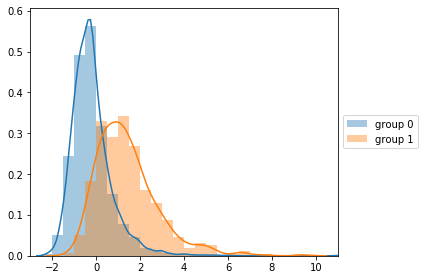

In [75]:
ldahist(lda_values["x"].LD1, y)

The separation achieved by the linear discriminant function on the training set may be an overestimate. To get a more accurate idea of how well the first discriminant function separates the groups, we would need to see a stacked histogram of the values for the target values using some unseen “test set”, that is, using a set of data that was not used to calculate the linear discriminant function.

We see that the discriminant function does not separate the data so well.

### Allocation Rules and Misclassification Rate

We can calculate the mean values of the discriminant functions for each of the two target values using the `printMeanAndSdByGroup()` function (see above):

In [80]:
printMeanAndSdByGroup(lda_values["x"], y);

## Means:


,LD1
V17,
0,-0.182885
1,1.404107



## Standard deviations:


,LD1
V17,
0,0.935561
1,1.397763



## Sample sizes:


,0
V17,
0,4000
1,521


In [81]:
def calcAllocationRuleAccuracy(ldavalue, groupvariable, cutoffpoints):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    confusion_matrix = []
    # calculate the number of true positives and false negatives for each group
    for i, leveli in enumerate(levels):
        levelidata = ldavalue[groupvariable==leveli]
        row = []
        # see how many of the samples from this group are classified in each group
        for j, levelj in enumerate(levels):
            if j == 0:
                cutoff1 = cutoffpoints[0]
                cutoff2 = "NA"
                results = (levelidata <= cutoff1).value_counts()
            elif j == numlevels-1:
                cutoff1 = cutoffpoints[numlevels-2]
                cutoff2 = "NA"
                results = (levelidata > cutoff1).value_counts()
            else:
                cutoff1 = cutoffpoints[j-1]
                cutoff2 = cutoffpoints[j]
                results = ((levelidata > cutoff1) & (levelidata <= cutoff2)).value_counts()
            try:
                trues = results[True]
            except KeyError:
                trues = 0
            print("Number of samples of group", leveli, "classified as group", levelj, ":", trues, "(cutoffs:", cutoff1, ",", cutoff2, ")")
            row.append(trues)
        confusion_matrix.append(row)
    return confusion_matrix

For example, to calculate the accuracy for the bank data based on the allocation rule for the first discriminant function, we type:

In [93]:
confusion_matrix = calcAllocationRuleAccuracy(lda_values["x"].iloc[:, 0], y, [1, 2])

Number of samples of group 0 classified as group 0 : 3642 (cutoffs: 1 , NA )
Number of samples of group 0 classified as group 1 : 358 (cutoffs: 1 , NA )
Number of samples of group 1 classified as group 0 : 225 (cutoffs: 1 , NA )
Number of samples of group 1 classified as group 1 : 296 (cutoffs: 1 , NA )


This can be displayed in a *confusion matrix*:

In [94]:
def webprint_confusion_matrix(confusion_matrix, classes_names):
    display(pd.DataFrame(confusion_matrix, index=["Is group "+i for i in classes_names], columns=["Allocated to group "+i for i in classes_names]))

webprint_confusion_matrix(confusion_matrix, lda.classes_)

,Allocated to group 0,Allocated to group 1
Is group 0,3642,358
Is group 1,225,296


There are 358+225=583 samples that are misclassified, out of 4521 customers. Therefore, the misclassification rate is 583/4521, or 12.89%. The misclassification rate is quite ok, and therefore the accuracy of the allocation rule appears to be relatively ok.

However, this is probably an underestimate of the misclassification rate, as the allocation rule was based on this data (this is the *training set*). If we calculated the misclassification rate for a separate *test set* consisting of data other than that used to make the allocation rule, we would probably get a higher estimate of the misclassification rate.

#### The Python way

Python allows to do all the above in a much faster way and providing extended automatic report capabilities by using the `sklearn.metrics` module. The above confusion matrix and reporting typical performance metrics, such as *precision*, *recall*, *f1-score* can be done in python as follows:

In [95]:
import sklearn.metrics as metrics

def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]
    
y_pred = lda_values["x"].iloc[:, 0].apply(lda_classify, args=(lda.classes_, [-1.751107, 2.122505],)).values
y_true = y

In [97]:
# from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print(metrics.classification_report(y_true, y_pred))
cm = metrics.confusion_matrix(y_true, y_pred)
webprint_confusion_matrix(cm, lda.classes_)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4000
           1       0.55      0.23      0.32       521

   micro avg       0.89      0.89      0.89      4521
   macro avg       0.73      0.60      0.63      4521
weighted avg       0.87      0.89      0.87      4521



,Allocated to group 0,Allocated to group 1
Is group 0,3905,95
Is group 1,403,118


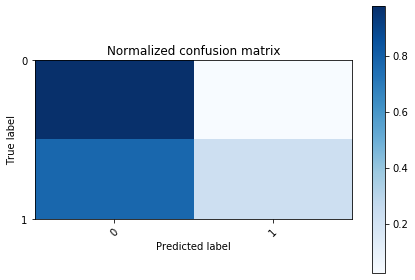

In [98]:
plot_confusion_matrix(cm_normalized, lda.classes_, title='Normalized confusion matrix')